이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 TF-IDF 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/31698

## **04-04 TF-IDF(Term Frequency-Inverse Document Frequency)**
---

이번에는 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해서 알아보겠습니다. TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교할 수 있습니다. TF-IDF가 DTM보다 항상 좋은 성능을 보장하는 것은 아니지만, 많은 경우에서 DTM보다 더 좋은 성능을 얻을 수 있습니다.

---
### **1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)**

**TF-IDF(Term Frequency-Inverse Document Frequency)** 는 **단어의 빈도**와 **역 문서 빈도(문서의 빈도에 특정 식을 취함)** 를 사용하여 **DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법** 입니다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

#### **(1) $tf(d,t)$ : 특정 문서 d에서의 특정 단어 t의 등장 횟수.**
생소한 글자때문에 어려워보일 수 있지만, 잘 생각해보면 TF는 이미 앞에서 구한 적이 있습니다. TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다.

#### **(2) $df(t)$ : 특정 단어 t가 등장한 문서의 수.**
여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 **단어 t가 등장한 문서의 수에만 관심** 을 가집니다. 앞서 배운 DTM에서 바나나는 문서2와 문서3에서 등장했습니다. 이 경우, 바나나의 df는 2입니다. 문서3에서 바나나가 두 번 등장했지만, 그것은 중요한 게 아닙니다. 심지어 바나나란 단어가 문서2에서 100번 등장했고, 문서3에서 200번 등장했다고 하더라도 바나나의 df는 2가 됩니다.

#### **(3) $idf(t)$ : $df(t)$에 반비례하는 수.**  
$$idf(d, t) = log(\frac{n}{1+df(t)})$$

$$n : 총 문서의 수$$

IDF라는 이름을 보고 DF의 역수가 아닐까 생각했다면, IDF는 DF의 역수를 취하고 싶은 것이 맞습니다. 그런데 log와 분모에 1을 더해주는 식에 의아하실 수 있습니다. log를 사용하지 않았을 때, IDF를 DF의 역수($\frac{n}{df(t)}$라는 식)로 사용한다면 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 됩니다. 그렇기 때문에 log를 사용합니다.

왜 log가 필요한지 n=1,000,000일 때의 예를 들어봅시다. log의 밑은 10을 사용한다고 가정하였을 때 결과는 아래와 같습니다.

$idf(t) = log(n/df(t))$  
$n=1,000,000$


|단어 $t$| $df(t)$  | $idf(d, t) $ |
|---|---|---|
|word1	|1	    |6  |
|word2	|100	|4  |
|word3	|1,000	|3  |
|word4	|10,000	|2  |
|word5	|100,000	|1  |
|word6	|1,000,000	|0  |

그렇다면 log를 사용하지 않으면 idf의 값이 어떻게 커지는지 보겠습니다.

$idf(t) = n/df(t)$  
$n=1,000,000$

|단어 $t$| $df(t)$  | $idf(d, t) $ |
|---|---|---|
|word1	|1	    |1,000,000  |
|word2	|100	|10,000  |
|word3	|1,000	|1,000  |
|word4	|10,000	|100  |
|word5	|100,000	|10  |
|word6	|1,000,000	|1  |

또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. 그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다. 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다. log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다.

TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

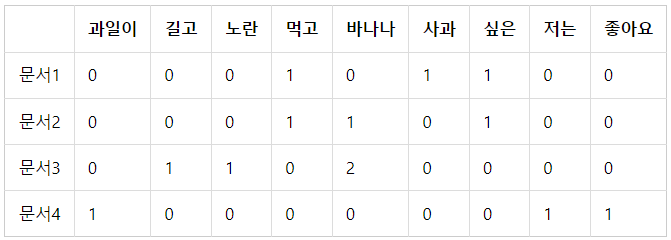

앞서 DTM을 설명하기위해 들었던 위의 예제를 가지고 **TF-IDF에 대해** 이해해보겠습니다. 우선 TF는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서에서의 각 단어의 TF가 됩니다. 이제 구해야할 것은 TF와 곱해야할 값인 IDF입니다. 로그는 자연 로그를 사용하도록 하겠습니다. 자연 로그는 로그의 밑을 자연 상수 e(e=2.718281...)를 사용하는 로그를 말합니다. IDF 계산을 위해 사용하는 **로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있는데,** 여기서 로그는 마치 기존의 값에 곱하여 **값의 크기를 조절하는 상수의 역할** 을 합니다. 각종 프로그래밍 언어에서 패키지로 지원하는 TF-IDF의 로그는 대부분 자연 로그를 사용합니다. 여기서도 자연 로그를 사용하겠습니다. 자연 로그는 보통 log라고 표현하지 않고, ln이라고 표현합니다.  
  
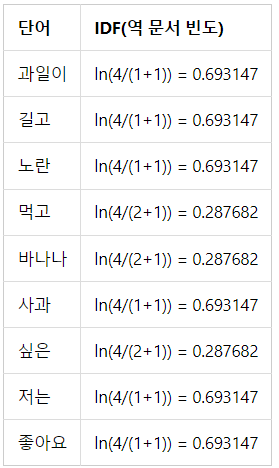

문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일합니다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가집니다. 각 단어에 대해서 IDF의 값을 비교해보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보입니다. IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 하기 때문입니다.

TF-IDF를 계산해보겠습니다. 각 단어의 TF는 DTM에서의 각 단어의 값과 같으므로, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 곱해주면 TF-IDF 값을 얻습니다.

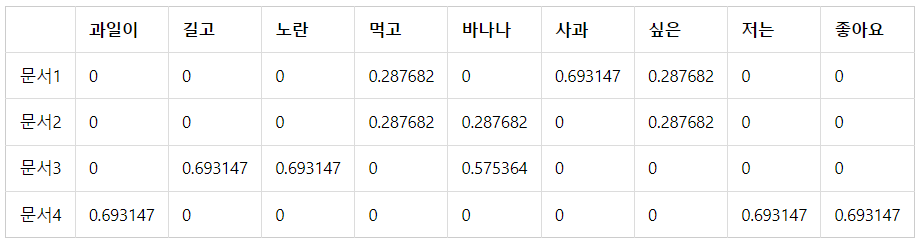

사실 예제 문서가 굉장히 간단하기 때문에 계산은 매우 쉽습니다. 문서3에서의 바나나만 TF 값이 2이므로 IDF에 2를 곱해주고, 나머진 TF 값이 1이므로 그대로 IDF 값을 가져오면 됩니다. 문서2에서의 바나나의 TF-IDF 가중치와 문서3에서의 바나나의 TF-IDF 가중치가 다른 것을 볼 수 있습니다. 수식적으로 말하면, TF가 각각 1과 2로 달랐기 때문인데 TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하기 때문입니다. 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.

---
### **2. 파이썬으로 TF-IDF 직접 구현하기**

위의 계산 과정을 파이썬으로 직접 구현해보겠습니다. 앞의 설명에서 사용한 4개의 문서를 docs에 저장합니다.

In [2]:
from math import log
import pandas as pd
 
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
 
set(w for doc in docs for w in doc.split())  # 토큰화

{'과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요'}

In [3]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 9
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.

In [4]:
# 총 문서의 수
N = len(docs) 
 
def tf(t, d):
  return d.count(t)
 
def idf(t):
  df = 0
  for doc in docs:
    df += (t in doc)   # doc(문서) 리스트에 단어(t)가 있으면 True(1): 1이 더해짐
  return log(N / (df + 1))
 
def tfidf(t, d):
  return tf(t, d) * idf(t)

In [5]:
N

4

TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.

In [6]:
docs

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [7]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):  
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


정상적으로 DTM이 출력되었습니다. 각 단어에 대한 IDF 값을 구해봅시다.

In [8]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
result

[0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.28768207245178085,
 0.28768207245178085,
 0.6931471805599453,
 0.28768207245178085,
 0.6931471805599453,
 0.6931471805599453]

In [9]:
idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


위에서 수기로 구한 IDF 값들과 정확히 일치합니다. TF-IDF 행렬을 출력해봅시다.

In [10]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


TF-IDF의 가장 기본적인 식에 대해서 학습하고 실제로 구현하는 실습을 진행해보았습니다. 사실 실제 TF-IDF 구현을 제공하고 있는 많은 머신 러닝 패키지들은 패키지마다 식이 조금씩 상이하지만, 위에서 배운 식과는 다른 조정된 식을 사용합니다. 그 이유는 위의 기본적인 식을 바탕으로 한 구현에는 몇 가지 문제점이 존재하기 때문입니다. 만약 전체 문서의 수 $n$이 4인데, $df(t)$의 값이 3인 경우에는 어떤 일이 벌어질까요? 
$df(t)$에 1이 더해지면서 $log$항의 분자와 분모의 값이 같아지게 됩니다. 이는 
의 진수값이 1이 되면서 $idf(d, t)$의 값이 0이 됨을 의미합니다. 식으로 표현하면 $idf(d, t) = log(n/(df(t) + 1))=0 $입니다. IDF의 값이 0이라면 더 이상 가중치의 역할을 수행하지 못합니다. 아래에서 실습할 사이킷런의 TF-IDF 구현체 또한 위의 식에서 조정된 식을 사용하고 있습니다.

---
### **3. 사이킷런을 이용한 DTM과 TF-IDF 실습**

사이킷런을 통해 DTM과 TF-IDF를 만들어보겠습니다. BoW를 설명하며 배운 CountVectorizer를 사용하면 DTM을 만들 수 있습니다.

In [11]:
## DTM (Document Temr Matrix)은 CounterVectorizer로 구함
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

## 코퍼스로 부터 각 단어의 빈도수 기록 (DTM : Document Term Matrix)
vector.fit_transform(corpus).toarray()   # Term Frequency

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]], dtype=int64)

DTM이 완성되었습니다. DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보았습니다. 첫번째 열의 경우에는 0의 인덱스를 가진 do입니다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했으므로 첫번째 행에서만 1의 값을 가집니다.

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공합니다. 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 기본 식에서 조정된 식을 사용합니다. 요약하자면, IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이로 TF-IDF가 가진 의도는 여전히 그대로 갖고 있습니다.

In [12]:
## 단어 사전 (각 단어와 맵핑된 인덱스)
vector.vocabulary_

{'you': 7,
 'know': 1,
 'want': 5,
 'your': 8,
 'love': 3,
 'like': 2,
 'what': 6,
 'should': 4,
 'do': 0}

In [13]:
## tf-idf : Counter Vectorizer와 매우 유사
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidf_vectorizer = TfidfVectorizer().fit(corpus)
tfidf_ = tfidf_vectorizer.transform(corpus).toarray()
tfidf_  # tfidf 벡터화화

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

In [14]:
## 단어사전
tfidf_vectorizer.vocabulary_

{'you': 7,
 'know': 1,
 'want': 5,
 'your': 8,
 'love': 3,
 'like': 2,
 'what': 6,
 'should': 4,
 'do': 0}

In [15]:
## Pandas DataFrame으로 tfidf 결과 
pd.DataFrame(tfidf_)

,0,1,2,3,4,5,6,7,8
0,0.00000,0.467351,0.000000,0.467351,0.00000,0.467351,0.00000,0.355432,0.467351
1,0.00000,0.000000,0.795961,0.000000,0.00000,0.000000,0.00000,0.605349,0.000000
2,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000


BoW, DTM, TF-IDF에 대해서 전부 학습했습니다. 문서들 간의 유사도를 구하기 위한 재료 손질하는 방법을 배운 셈입니다. 케라스로도 DTM과 TF-IDF 행렬을 만들 수 있는데, 이는 딥 러닝 챕터의 다층 퍼셉트론으로 텍스트 분류하기 실습에서 별도로 다루겠습니다. 다음 챕터에서 유사도를 구하는 방법과 이를 이용한 실습을 진행해보겠습니다.

사이킷런의 TF-IDF의 수식을 이해하고 싶은 분들을 위해서 위키독스 웹 사이트에 댓글로 설명해놨습니다. 궁금하신 분들은 참고하세요.



In [16]:
### tf-idf 계산 공식은 Tool마다 조금씩 다름
### Smoothing 등을 할때 +1 등... 약간의 변화를 주는 경우.
### 전체적인 아이디어(취지)가 같고, 표현법만 다를뿐... 같은 방법으로 벡터화를 하면 문제 없음

In [17]:
## 위의 예제를 Scikit Learn TfidfVectorizer로 계산
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
 
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
tfidfv = TfidfVectorizer().fit(docs)
tfidf_ = tfidfv.transform(docs).toarray()
print(tfidf_)
print(tfidfv.vocabulary_)
pd.DataFrame(tfidf_)  # 위에서 직접 계산한 값과 다르게 나옴!

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


,0,1,2,3,4,5,6,7,8
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


마지막 편집일시 : 2022년 11월 14일 2:47 오후